In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


In [2]:
c

Client Scheduler: tcp://127.0.0.1:34418 Dashboard: http://127.0.0.1:33998/status,Cluster Workers: 8 Cores: 48 Memory: 134.91 GB


In [3]:
import xarray as xr 
import dask 
import numpy as np 
import os 
import time 
import glob
from datetime import date
import numpy.ma as ma

today=date.today()

#pip install windrose 
from windrose import WindroseAxes
import matplotlib.pyplot as plt


import seaborn as sns
sns.set(color_codes=True)

#https://pmall.univ-grenoble-alpes.fr/docs/auto_examples_code/windrose/windrose-exemple.html

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprec

In [4]:
Date_sept=['20120901','20120902','20120903','20120904','20120905','20120906','20120907','20120908','20120909','20120910','20120911','20120912','20120913','20120914','20120915','20120916','20120917','20120918','20120919','20120920','20120921','20120922','20120923','20120924','20120925','20120926','20120927','20120928','20120929','20120930']
Date_march=['20130301','20130302','20130303','20130304','20130305','20130306','20130307','20130308','20130309','20130310','20130311','20130312','20130313','20130314','20130315','20130316','20130317','20130318','20130319','20130320','20130321','20130322','20130323','20130324','20130325','20130326','20130327','20130328','20130329','20130330']
Date_month={'march':Date_march,'sept':Date_sept}

In [5]:
def get_mag_angle(box,month):
    print('get mag and angle for box '+str(box)+' and month '+str(month))
    Date=Date_month[month]
    datasets_mag = []
    datasets_tu = []
    for date in Date:
        zmag_file = '/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_magR_'+str(date)+'.1d_'+str(box)+'.nc'
        ztu_file='/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_Tu_'+str(date)+'.1d_'+str(box)+'.nc'
        zdsmag=xr.open_dataset(zmag_file)
        zdstu=xr.open_dataset(ztu_file)
        datasets_mag.append(zdsmag)
        datasets_tu.append(zdstu)
    all_mag=xr.concat(datasets_mag,dim='z')
    all_tu=xr.concat(datasets_tu,dim='z')
    magR=all_mag['magR']
    Tu=all_tu['Tu']
    return magR,Tu
   
    
    

In [6]:
magR_sept_AC,Tu_sept_AC=get_mag_angle('AC','sept')
magR_march_AC,Tu_march_AC=get_mag_angle('AC','march')


get mag and angle for box AC and month sept
get mag and angle for box AC and month march


In [8]:
len(magR_sept_AC)

3182638

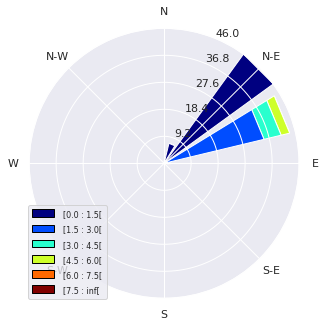

In [11]:
fig = plt.figure(figsize=(10, 5))

rectangle = [0.1, 0.1, 0.75, 0.75]
ax = WindroseAxes(fig,rectangle)
fig.add_axes(ax)
ax.bar(Tu_sept_AC[0:100]*180/np.pi, magR_sept_AC[0:100], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
